In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


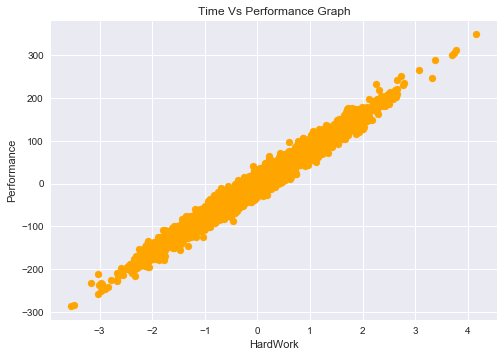

In [21]:
X = pd.read_csv('./Linear_X_Train.csv')
y = pd.read_csv('./Linear_Y_Train.csv')

#convert the x and y value in numpy array
X = X.values
y = y.values

#Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

#Visualsie
plt.style.use("seaborn")
plt.scatter(X,y,color="orange")
plt.title("Time Vs Performance Graph")
plt.xlabel("HardWork")
plt.ylabel("Performance")
plt.show()

In [22]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list

In [23]:
theta ,error_list =gradientDescent(X,y)

In [24]:
theta

array([ 0.6838508 , 79.90361453])

In [40]:
print(y)

[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


In [25]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

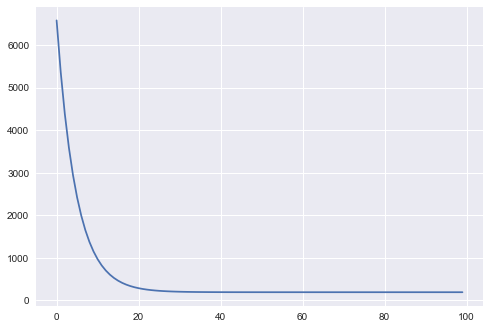

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


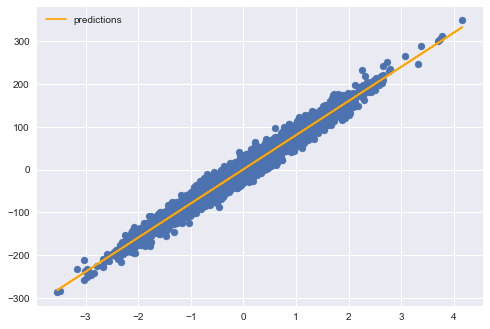

In [28]:
#plot traing + predictions
plt.scatter(X,y)
plt.plot(X,y_,color ="orange",label ="predictions" )
plt.legend()
plt.show()

In [33]:
#load the test data 
X_test = pd.read_csv('./Linear_X_Test.csv',encoding="utf-8")
y_test = hypothesis(X_test,theta)


In [47]:
df = pd.DataFrame(data = y_test,columns =["x"])

In [48]:
print(df)

               x
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]


In [49]:
df.to_csv('y_prediction.csv',index=False) #to save the file in csv